# Lab02 - Point-based Processing

### CDS6334 Visual Information Processing


This lab introduces the concept of *point-based* processing. As before, this lab is primarily guided in many portions and there are sections with questions that you are attempt to complete. 

First, load the necessary libraries...

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## I. Image Transformation

Point-based processing involves the direct transformation of each pixel value in an image. An image $f(x,y)$ is said to have undergone a transformation $T$ to an output image $g(x,y)$. In other words, each pixel in $f$ is put thru a function $T$ to get a new value $g$:

\begin{equation}g(x,y)= T(f(x,y))\end{equation}

### A. Negative Image
One of the simplest functions that we can apply to an image is the <b>negative function</b>. 

\begin{equation}g=(L-1)-f\end{equation}

So each value is subtracted by 255. So what happens is that the lighter pixels become dark and the darker picture becomes light. And it results in image negative.

We shall use the image of a pouting girl:
<img src="pout.png" style="width:150px">

In [2]:
pout = cv2.imread('pout.png',0) 
pout.ndim

2

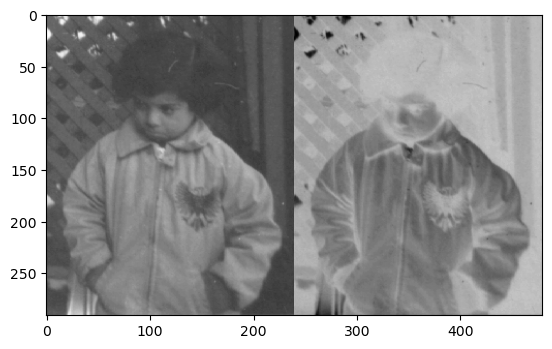

In [3]:
negpout = 255-pout   # 256-1-pout
plt.imshow(pout, cmap='gray')
plt.imshow(np.hstack((pout,negpout)), cmap='gray')
plt.show()

In [4]:
import sys
np.set_printoptions(threshold=sys.maxsize)#np.nan)   # this is to print full numpy array
print(negpout)

[[148 147 148 149 156 154 153 148 148 152 143  91  55  58  85  73  42  41
   43  58 118 143 145 146 143 145 148 150 149 149 148 146 147 149 149 149
  156 157 156 154 156 153 152 150 152 136 108  50  51  46  48  62 113 132
  145 148 150 152 150 152 153 156 157 156 153 153 156 156 161 158 158 158
  160 161 161 162 164 161 160 153 150 142 133 125 136 158 161 161 161 162
  164 164 166 166 169 168 169 168 168 168 168 168 168 168 168 168 166 166
  166 164 164 166 166 161 111  71  96 109 145 157 157 161 162 161 161 162
  162 162 160 161 161 164 161 162 166 169 168 166 166 168 164 164 166 168
  166 168 166 160 153 138 118 116 139 157 164 164 164 164 164 164 164 166
  162 164 166 166 166 166 172 173 172 172 168 171 172 173 177 175 173 172
  172 171 172 169 166 168 169 171 171 171 162 160 158 158 158 156 156 157
  156 156 157 158 162 166 172 173 173 171 171 166 162 160 160 156 157 157
  157 157 158 157 156 157 157 158 160 162 164 166 166 168 168 168 168 168
  169 169 169 171 172 172]
 [146 149 1

### B. Log Transformation

Non-linear functions can also be applied. They offer a lot more uses especially when the condition of the original image is poor to begin with. The <b>log transformation function</b> is one which is able to stretch the distribution of the pixels:

\begin{equation}
g=c. \text{log} (1+f)
\end{equation}

Where g and f are the pixel values of the output and the input image and c is a constant. The value 1 is added to each of the pixel value of the input image because if there is a pixel intensity of 0 in the image, then log(0) is equal to infinity. So 1 is added, to make the minimum value at least 1.

During log transformation, the dark pixels in an image are expanded as compared to the higher pixel values. The higher pixel values are kind of compressed in log transformation. This result in the following image enhancement.

The value of c in the log transform adjust the kind of enhancement we are looking for.

- c simple multiplication 
- pixel value may have zero values


uint8


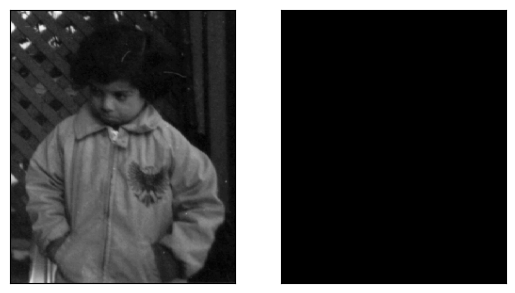

In [5]:
c = 0.25 
logpout = np.uint8(c*np.log(1.000001+pout))
logpout
print(logpout.dtype)
plt.subplot(121), plt.imshow(pout, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(logpout, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

### C. Gamma Correction

<b>Gamma correction</b> is a nonlinear operation used to encode and decode luminance or tristimulus values in video or still image systems. Gamma correction is also known as the <b>Power Law Transform</b>. First, the image pixel intensities must be scaled from the range 0, 255 to 0, 1.0. From there, we obtain our output gamma corrected image by applying the following equation:
\begin{equation} g = c.f^{(1/\gamma)} \end{equation}

where $f$ is the input image and $\gamma$ is the gamma value. The output image, $f$ is then scaled back to the range 0-255.

<b>The Reason of Gamma Correction</b>

The reason we apply gamma correction is that our eyes perceive color and luminance differently than the sensors in a digital camera. When a sensor on a digital camera picks up twice the amount of photons, the signal is doubled. However, our eyes do not work like this. Instead, our eyes perceive double the amount of light as only a fraction brighter. Thus, while a digital camera has a linear relationship between brightness our eyes have a non-linear relationship. In order to account for this relationship, we apply gamma correction.

- digital image -> type (unit8)
- any pixel in the range [0,225]
- can be pre-calculate the table , cuz the number/pixel will no random change

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

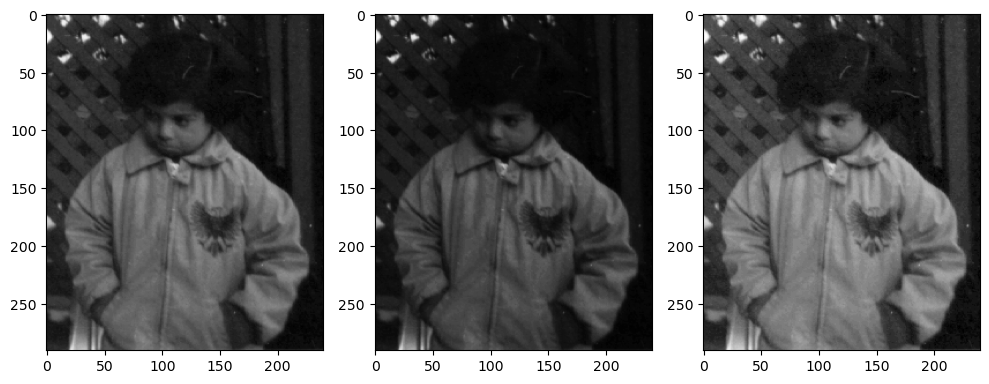

In [6]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    print(table)
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

pout
plt.figure(figsize=(10,4))
plt.subplot(131), plt.imshow(adjust_gamma(pout, 1), cmap='gray')
plt.subplot(132), plt.imshow(adjust_gamma(pout, 0.5), cmap='gray')
plt.subplot(133), plt.imshow(adjust_gamma(pout, 5),cmap='gray')
plt.tight_layout()
plt.show()

# when gamma value descrease, the image will be shown darkness
# when gamma value increase, the image will be shown brighter

**Q1**: Apply the (1) <b>negative</b>, (2) <b>log transformation</b> and (3) <b>gamma</b> function to the following color image, "parrot.png". For log transformation, apply to the gray image of the parrot.<br>
<img src="parrot.png" style="width:250px">

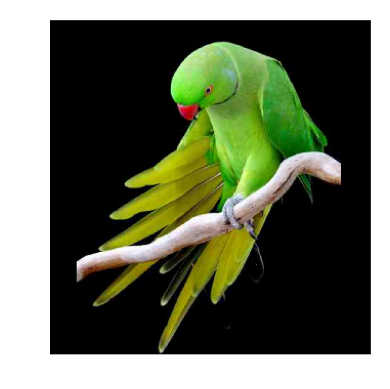

In [24]:
# Read the image
image = cv2.imread('parrot.png')

# Convert from BGR to RGB
parrot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(parrot)
plt.axis('off')
plt.show()


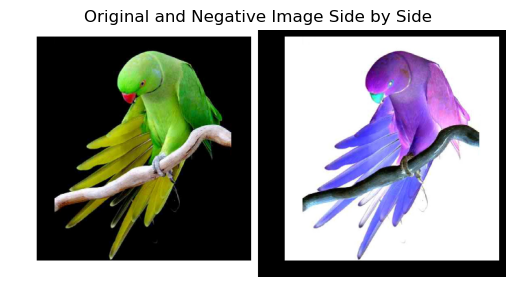

In [8]:
# Apply negative transformation
negative = 255 - parrot

# Display the result
plt.imshow(np.hstack((parrot, negative)))
plt.axis('off')  # Hides axes for cleaner display
plt.title("Original and Negative Image Side by Side")
plt.show()

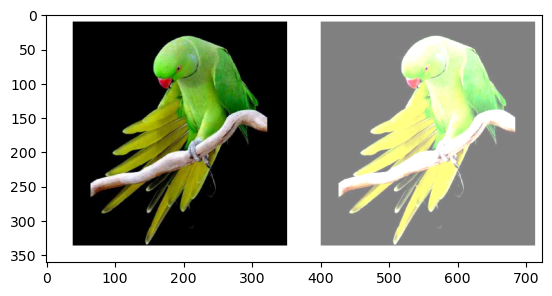

In [9]:
#add function

parrot_div = np.clip(128+parrot.astype(np.float32),0,255).astype(np.uint8)
plt.imshow(np.hstack((parrot,parrot_div)))
plt.show()

**Q2**: Try to implement the following three functions on the `pout.png` image:<br>
<img src="arithmetic-operations.png" style="width:500px">

In [10]:
#Enter code here


## II. Histograms

An image histogram is typically a graphical plot that shows the frequency of occurrence (or distribution) of intensity levels in an image *(Note: Later, we will learn that histograms are simply a vector of count values that can be used for more higher-level tasks like representation and description.)* Two concepts are most important in a histogram:
- BINS: the number of compartments we wish to use to group the intensity values into. Typically, we just use a bin for every intensity value (hence, 256 bins in total), or we can also use larger bins that can take a range of values, i.e. 16 bins for each 16 intensity values.
- RANGE: the range of intensity values that you want to measure. Normally it's [0, 256]

There are two functions that can be used to calculate histograms (one from OpenCV, the other from Numpy). Check out the documentation to find out more about the input parameters for [`cv2.calcHist`](https://docs.opencv.org/3.4.1/d6/dc7/group__imgproc__hist.html) and [`np.histogram`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html).

In [11]:
pout = cv2.imread('pout.png', cv2.IMREAD_GRAYSCALE)
hist0 = cv2.calcHist([pout],[0],None,[256],[0,256])    # using OpenCV function
hist,bins = np.histogram(pout.ravel(),256,[0,256])     # using Numpy function

In [12]:
print(bins)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

*Note: OpenCV function is faster (around 40x) than np.histogram(). So take this point into consideration when efficiency is a priority.*

There are two ways to plot the histogram -- using Matplotlib and using OpenCV drawing functions. We will stick to using Matplotlib as it is more straightforward.

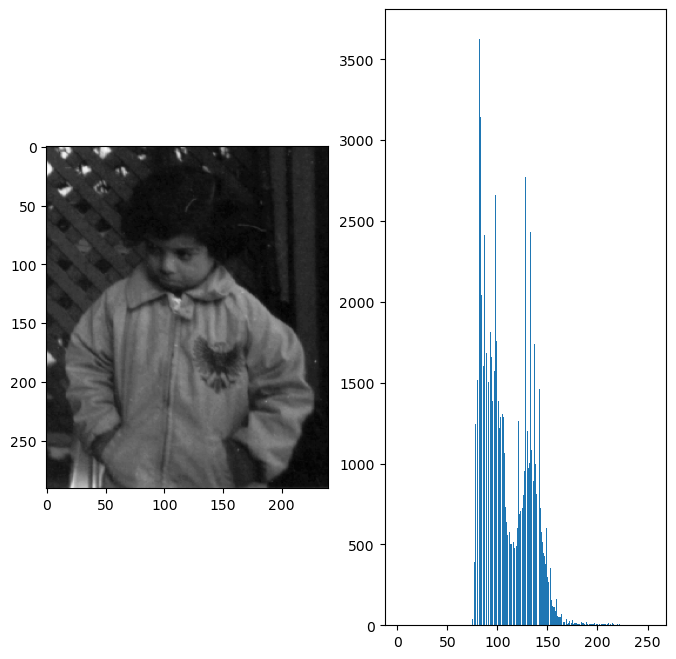

In [13]:
# Using matplotlib
plt.figure(figsize=(8,8))
plt.subplot(121), plt.imshow(pout, cmap='gray')
plt.subplot(122), plt.hist(pout.ravel(),256,[0,256]); 
plt.show()

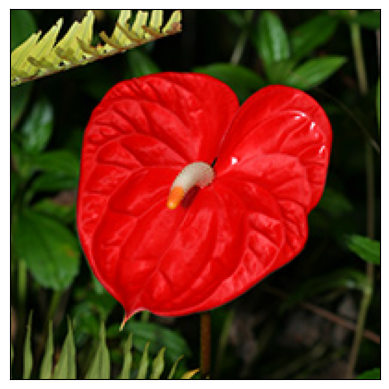

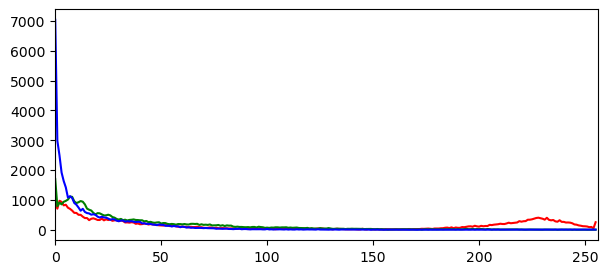

In [14]:
def showImage(img, titlestr="" ):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.xticks([]), plt.yticks([])  
    plt.title(titlestr)
    plt.show()
    
# Using OpenCV
rf = cv2.imread('redflower.jpg')
rf = cv2.cvtColor(rf, cv2.COLOR_BGR2RGB)  
showImage(rf)
plt.figure(figsize=(7,3))
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([rf],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Noticed how the individual red, green and blue channels are distributed across the intensity values?
Tinker with the number of bins to make more observations.

#### Application of Mask

We used <b>cv2.calcHist()</b> to find the histogram of the full image. What if you want to find histograms of some regions of an image? Just create a mask image with white color on the region you want to find histogram and black otherwise. Then pass this as the mask.

The mask is created in the following code snipplet. Complete the program to create and show the histogram with the mask.


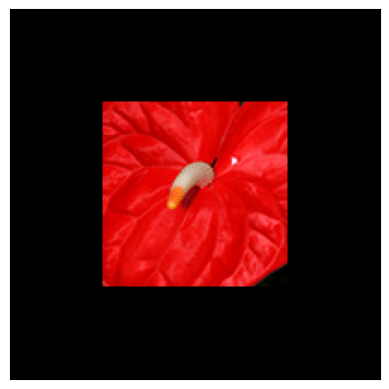

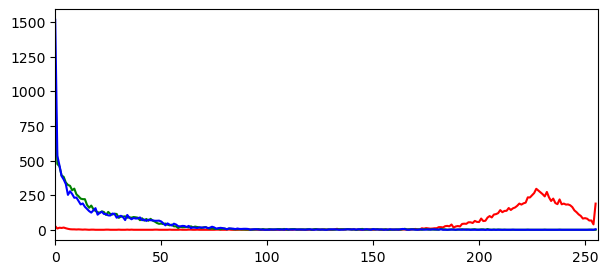

In [15]:
# create a mask
mask = np.zeros(rf.shape[:2], np.uint8)
mask[50:150, 50:150] = 255
masked_img = cv2.bitwise_and(rf,rf,mask = mask)

# create and show the histogram with the mask
showImage(masked_img)
plt.figure(figsize=(7,3))
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([masked_img],[i],mask,[256],[0,256]) #enter your code here
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# mask : ignore the black pixel



### Histogram Equalization

Histogram equalization attemps to improve the distribution of intensity values in an image by equalizing or "flattening" the histogram as much as possible. 

_______________________________________________________________________________________________________________________
- Historgram Equalization
1. spread histrogram bins across whole range
2. make histogram bins height as equal as possible
   -> improve contrast
   -> no different if repeat

- Histogram Equalization for RGB
1. Read image
2. convert BGR to RGB
3. split channels into individual channels , R,G,B
4. HE each individually
5. merge RGB channels back
6. show image side by side 

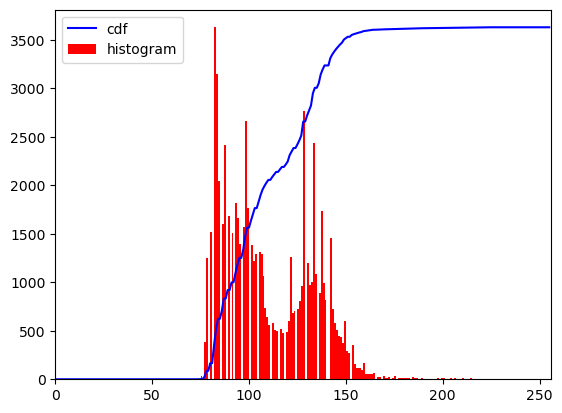

In [16]:
hist,bins = np.histogram(pout.flatten(),256,[0,256])

# this finds the cdf of the histogram 
cdf = hist.cumsum()      

cdf_normalized = cdf * hist.max()/ cdf.max()     # normalize just to scale values down to show it clearly within histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(pout.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

You can see that the histogram lies a narrow middle range. We need it to occupy the full spectrum. In pixel- or point-based image transformation, we need a transformation function which spreads out the current pixels in the middle range to both ends of the spectrum. That is what histogram equalization can do.

Now, find the minimum histogram value (excluding 0) and apply a simple scaling of the CDF values back to the standard intensity range of [0, 255]. In theory, we normalize the CDF to [0, 1] before multiplying with the maximum of the range (L-1), which is 255. They will get us the same thing.

The concept of a masked array from Numpy is used here, that is, all operations are performed on non-masked elements. You can read more about it from Numpy docs on [masked arrays](https://docs.scipy.org/doc/numpy/reference/maskedarray.html).

In [17]:
cdf_m = np.ma.masked_equal(cdf,0)
#print(cdf)
cdf_m = np.round((cdf_m - cdf_m.min())/(cdf_m.max()-cdf_m.min())*255)     # discretize back the CDF values to [0, 255]
#print(cdf_m)
new_cdf = np.ma.filled(cdf_m,0).astype('uint8')
#print(new_cdf)

# this does the mapping -- using the scaled cdf to look for the new intensity values
pout2 = new_cdf[pout]       

Use again the earlier code to draw the histogram and cdf plot together. Observe what happens to both the histogram and cdf plot. 

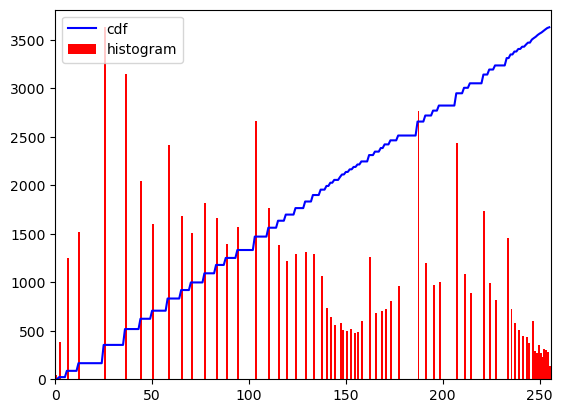

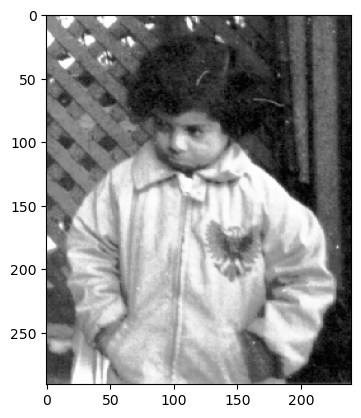

In [18]:
hist2,bins = np.histogram(pout2.flatten(),256,[0,256])

cdf2 = hist2.cumsum()

cdf_normalized = cdf2 * hist2.max()/ cdf2.max()     # normalize just to scale values down to show it clearly within histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(pout2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
plt.imshow(pout2, cmap='gray'); plt.show()

OpenCV provides a function to perform histogram equalization, `equalizeHist`. 


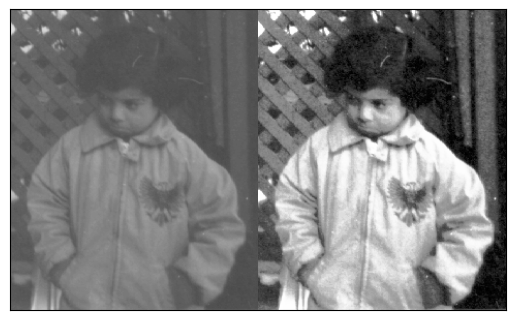

In [19]:
equalized = cv2.equalizeHist(pout)
pout_stack = np.hstack((pout,equalized)) #stacking images side-by-side. Useful function!
showImage(pout_stack)

**Q3**: What happens if you perform histogram equalization one more time?

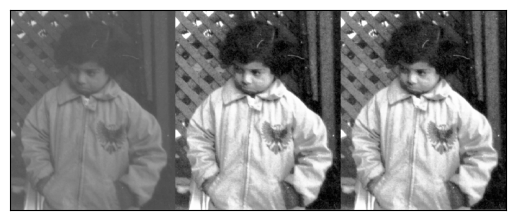

In [20]:
#Enter code here
equalization = cv2.equalizeHist(equalized)
equalization2 = cv2.equalizeHist(pout)
pout_stack = np.hstack((pout,equalization,equalization2))
showImage(pout_stack)


**Q4. Histogram equalization on color images**. 

Perform histogram equalization on the following color image.

<img src="landscape.jpg" style="width:300px">

Display the original and equalized image along with the respective histograms.

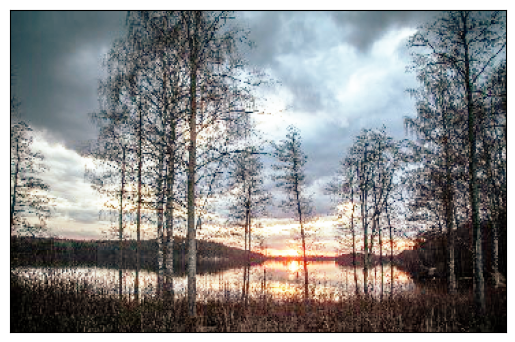

In [28]:
#Enter code here
landscape = cv2.imread('landscape.jpg')
landscape = cv2.cvtColor(landscape, cv2.COLOR_BGR2RGB)
origin_landscape = landscape.copy()

r,g,b = cv2.split(landscape)

color =[r,g,b]
for i in range (len(color)):
    landscape[:,:,i] = cv2.equalizeHist(landscape[:,:,i])

r = cv2.equalizeHist(r);
g = cv2.equalizeHist(g);
b = cv2.equalizeHist(b);

landscape_eq = cv2.merge((r,g,b))
# landscape_stack = np.hstack((landscape))
showImage(landscape)


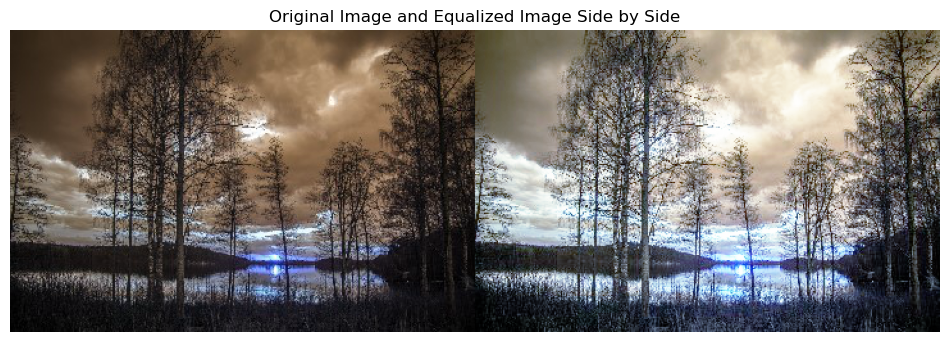

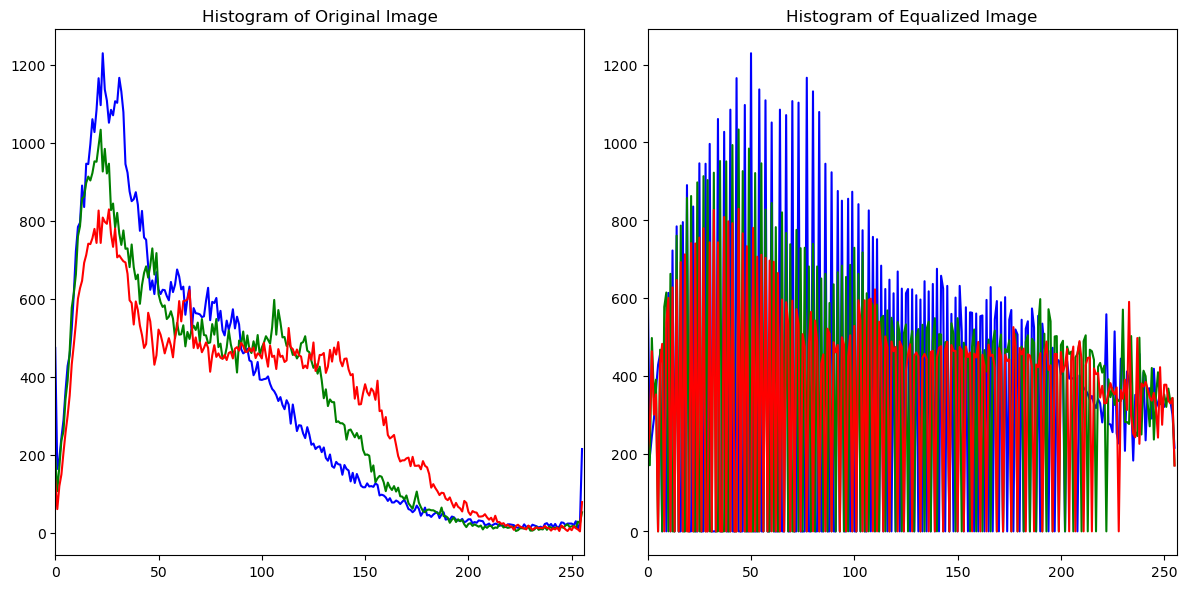

In [31]:
# Assuming `landscape` and `landscape_eq` are defined:
# Example: landscape = cv2.imread('landscape.jpg')
#          landscape_eq = cv2.equalizeHist(cv2.cvtColor(landscape, cv2.COLOR_BGR2GRAY))

# Horizontal stacking of the original and equalized images

landscape_stack = np.hstack((origin_landscape, landscape_eq))

# Display the stacked images
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(landscape_stack, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes for cleaner visualization
plt.title("Original Image and Equalized Image Side by Side")
plt.show()

# Plot the histograms for the original and equalized images
plt.figure(figsize=(12, 6))

color = ('b', 'g', 'r')  # Color channels
for i, col in enumerate(color):
    # Histogram for original image
    histr_orig = cv2.calcHist([origin_landscape], [i], None, [256], [0, 256])
    plt.subplot(1, 2, 1)
    plt.plot(histr_orig, color=col)
    plt.title("Histogram of Original Image")
    plt.xlim([0, 256])

    # Histogram for equalized image
    histr_eq = cv2.calcHist([landscape_eq], [i], None, [256], [0, 256])
    plt.subplot(1, 2, 2)
    plt.plot(histr_eq, color=col)
    plt.title("Histogram of Equalized Image")
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()


## Additional Exercise



### Contrast Stretching

Contrast stretching is a way to improve the contrast in an image by "stretching" the range of intensity values it contains to span a desired range of values. Typical usage is to stretch the low-contrast range to the full range of pixel values (0 to 255 or whichever range the image type concerned allows).

It can be characterized by piecewise linear functions:
<img src="piecewise-linear.png" style="width:250px">
<br>
\begin{equation}y=\frac{b_{i+1}-b_{i}}{a_{i+1}-a_{i}}(x-a_{i})+b_{i}\end{equation}

You can see that the drastic transformation occurs to the middle section of the original range; the narrow $a_2-a_3$ range is stretched to a much wider $b_2-b_3$ range. Meanwhile both ends of the original range is compressed to a slightly narrower output range.You can try to apply non-linear piecewise contrast stretching to the images above and compare with results of other types of enhancement techniques.

**Q**. Write a function that that calculate the output pixel value based on a piecewise linear function specified by values $a_{1},a_{2},...$ and $b_{1},b_{2},...$. Test it out on the `pout.tif` image.

In [23]:
#Enter code here


### Function Code Exercise

This exercise is to get you familiarized with the format required of the code submission in the upcoming individual assignment. In the provided materials, there is a folder containing a small dataset of 4 degraded images with the corresponding high quality groundtruths. Try to design a function to enhance these degraded images and place the code in the `adjustContrast.py` file. To evaluate the performance of your enhancement, just run the accompanying `evaluateContrast.py` which will compare the results with the groundtruth using 3 evaluation metrics, Mean Absolute Error (MAE), Peak Signal-to-Noise Ratio (PSNR), and Strutural Similarity (SSIM). <br>

In order for the codes to work, please pip install the `prettytable` package, and the evaluation results will be printed in your console.